# Automobile Price Prediction
## Table of Contents
<ul>
<li>Introduction</li>
<li>Importing The Libraries</li>
<li>Reading The Data</li>
<li>Data Inspection</li>
<li>Data Cleansing</li>
<li>Exploratory Data Analysis (EDA)</li>
<li> Feature Transformations</li>
<li>Building Model</li>
<li>Evaluating Model Performance</li>
<li>Conclusion</li>
</ul>

# Introduction

> In this project i will predict the price of cars by using automobile dataset.

# Importing The Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")
sns.set(rc={"figure.figsize":[7,7]},font_scale=1.1)

# Reading The Data

In [2]:
df=pd.read_csv("Automobile_data.csv",na_values="?")

In [3]:
#Displaying the first five records from the data
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


# Data Inspection

In [4]:
df.shape

(205, 26)

- No.of records:205
- No.of columns:26

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

- There are missing values in the data.
- No.of categorical features:10
- No.of Numerical features:16

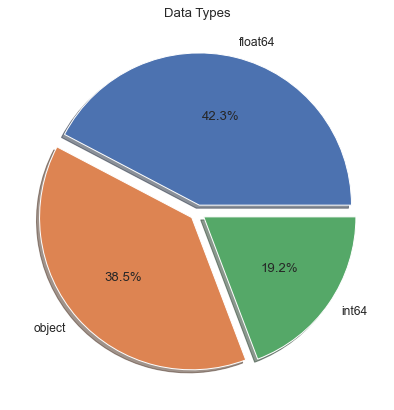

In [6]:
df.dtypes.value_counts().plot.pie(shadow=True,explode=[0.05,0.05,0.05],autopct="%1.1f%%")
plt.ylabel("")
plt.title("Data Types")
plt.show()

- Most common data type in this data are floats, it represents 42.3% of the data.

In [7]:
df.isna().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

- There are missing values in the data in these columns:
            - normalized-losses
            - num-of-doors
            - bore
            - stroke
            - horsepower
            - peak-rpm
            - price

In [8]:
#Describing the data
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,164.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,201.000000,201.000000,205.000000,203.000000,203.000000,205.000000,205.000000,201.000000
mean,0.834146,122.000000,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329751,3.255423,10.142537,104.256158,5125.369458,25.219512,30.751220,13207.129353
std,1.245307,35.442168,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.273539,0.316717,3.972040,39.714369,479.334560,6.542142,6.886443,7947.066342
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,115.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,150.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


# Data Cleansing

In [9]:
#Making a copy from the data frame
car_df=df.copy()

In [10]:
car_df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [11]:
#Average of numeric data
avg=car_df.mean()

In [12]:
#Replacing nans in numeric data by the mean
car_df.fillna(avg,inplace=True)
#Nans in the data
car_df.isna().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         2
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [13]:
#Unique values in num of doors feature
car_df["num-of-doors"].unique()

array(['two', 'four', nan], dtype=object)

In [14]:
#Replacing the nans in num of doors column by the mode
car_df["num-of-doors"].fillna(car_df["num-of-doors"].mode()[0],inplace=True)

In [15]:
#Nans in the data
car_df.isna().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

- Data are clean.

In [16]:
car_df.select_dtypes(include="object").head()

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
0,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi


In [17]:
#Unique values in num of doors feature
car_df["num-of-doors"].unique()

array(['two', 'four'], dtype=object)

In [18]:
#Unique values in num of cylinders feature
car_df["num-of-cylinders"].unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [19]:
#Taking a copy from car_df
car_df2=car_df.copy()

In [20]:
#Replacing categorical values with numeric values
car_df2["num-of-doors"]=car_df2["num-of-doors"].replace({"two":2,"four":4})
car_df2["num-of-cylinders"]=car_df2["num-of-cylinders"].replace({"four":4,"six":6,"five":5,"three":3,"twelve":12,"two":2,"eight":8})

In [21]:
car_df2.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,2,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,122.0,alfa-romero,gas,std,2,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,122.0,alfa-romero,gas,std,2,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,4,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,4,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


# Exploratory Data Analysis (EDA)

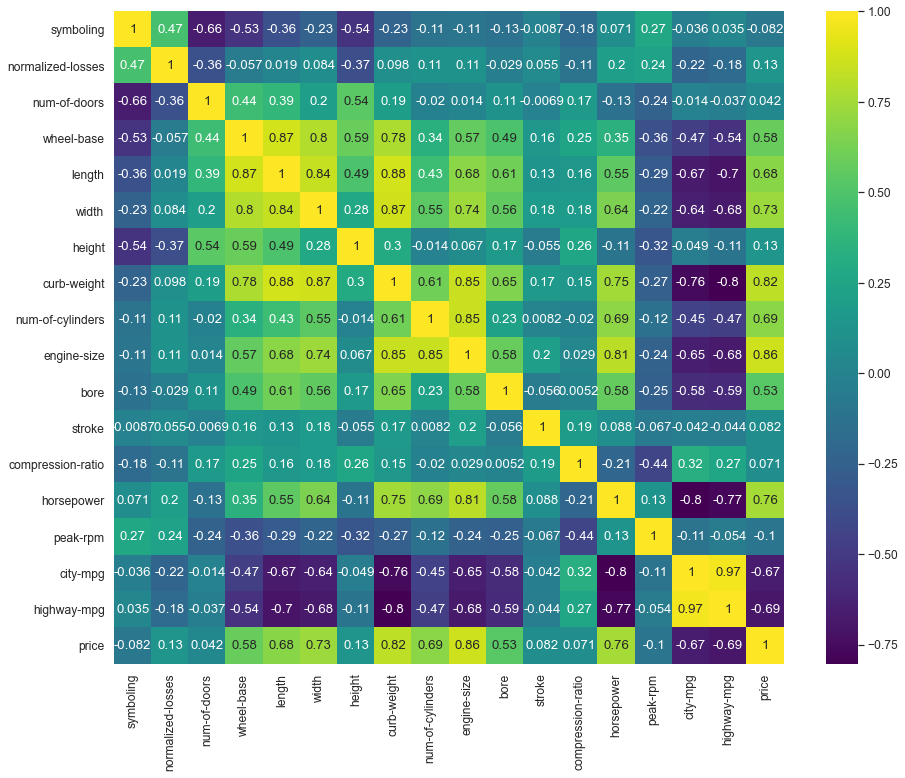

In [22]:
#Correlation between features
plt.figure(figsize=[15,12])
sns.heatmap(car_df2.corr(),annot=True,cmap="viridis")
plt.show()

In [23]:
#Creating a features_corr variable with ascending order
features_corr=car_df2.corr().unstack().sort_values()

In [24]:
features_corr

city-mpg           horsepower          -0.803162
horsepower         city-mpg            -0.803162
highway-mpg        curb-weight         -0.797465
curb-weight        highway-mpg         -0.797465
highway-mpg        horsepower          -0.770903
                                          ...   
compression-ratio  compression-ratio    1.000000
horsepower         horsepower           1.000000
peak-rpm           peak-rpm             1.000000
num-of-cylinders   num-of-cylinders     1.000000
price              price                1.000000
Length: 324, dtype: float64

In [25]:
#Selecting features with high correlation
high_corr=features_corr[(abs(features_corr)>0.7)&(abs(features_corr)<1.0)].drop_duplicates()

In [26]:
high_corr

city-mpg          horsepower    -0.803162
highway-mpg       curb-weight   -0.797465
                  horsepower    -0.770903
curb-weight       city-mpg      -0.757414
highway-mpg       length        -0.704662
price             width          0.728699
width             engine-size    0.735433
horsepower        curb-weight    0.750968
price             horsepower     0.757917
wheel-base        curb-weight    0.776386
                  width          0.795144
horsepower        engine-size    0.810713
curb-weight       price          0.820825
width             length         0.841118
num-of-cylinders  engine-size    0.846031
curb-weight       engine-size    0.850594
price             engine-size    0.861752
curb-weight       width          0.867032
wheel-base        length         0.874587
curb-weight       length         0.877728
city-mpg          highway-mpg    0.971337
dtype: float64

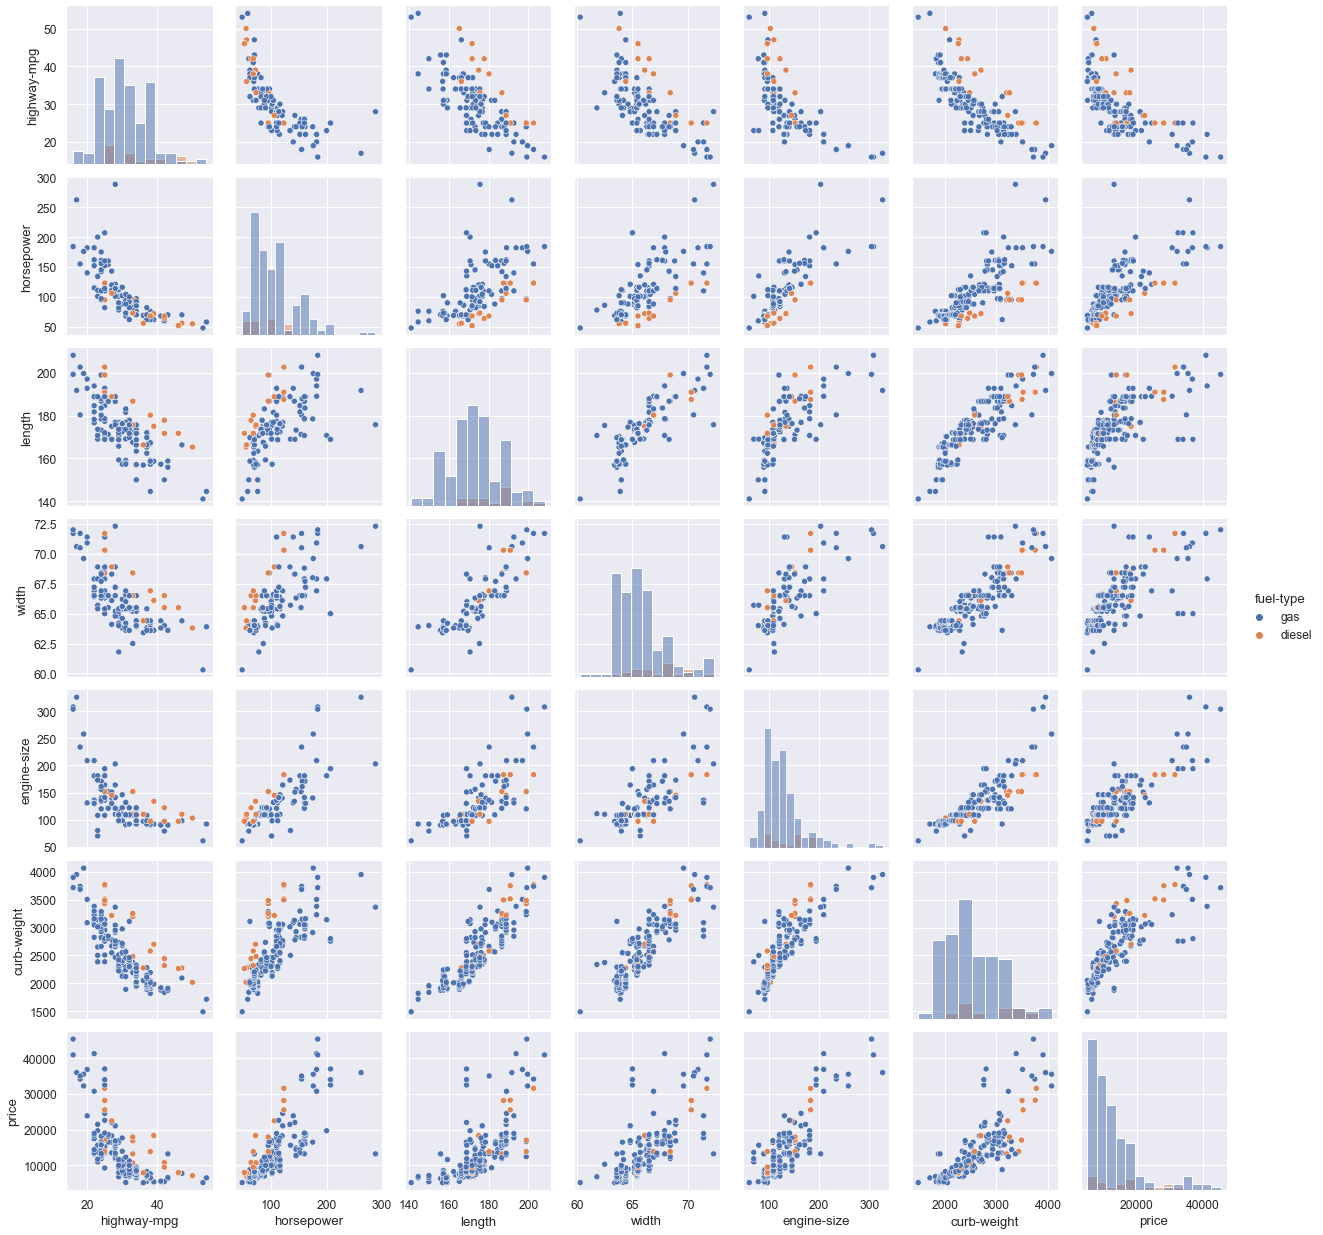

In [27]:
sns.pairplot(car_df2[["highway-mpg","horsepower","length","width","engine-size","curb-weight","fuel-type","price"]],diag_kind='hist',hue="fuel-type")
plt.show()

- From pairplot, there are strong positive correlation and strong negative correlation between features, and gas is used most in cars.

In [28]:
def cntplt(data,x,palette,title,y=None,hue=None):
    '''
    This function for showing the counts of observations in each categorical value.
    INPUT:
    data: DataFrame. The dataset.
    x: str. Feature name in the dataset.
    y: str. Feature name in the dataset.
    palette: str. Palette name.
    title: str. Countplot title.
    hue: str. Feature name in the dataset.
    OUTPUT:
    Countplot represent the counts of observations in each categorical value.
    '''
    sns.countplot(data=data,x=x,y=y,hue=hue,palette=palette)
    plt.ylabel("Count")
    plt.xlabel(x.title())
    plt.title(title.title())
    plt.show()

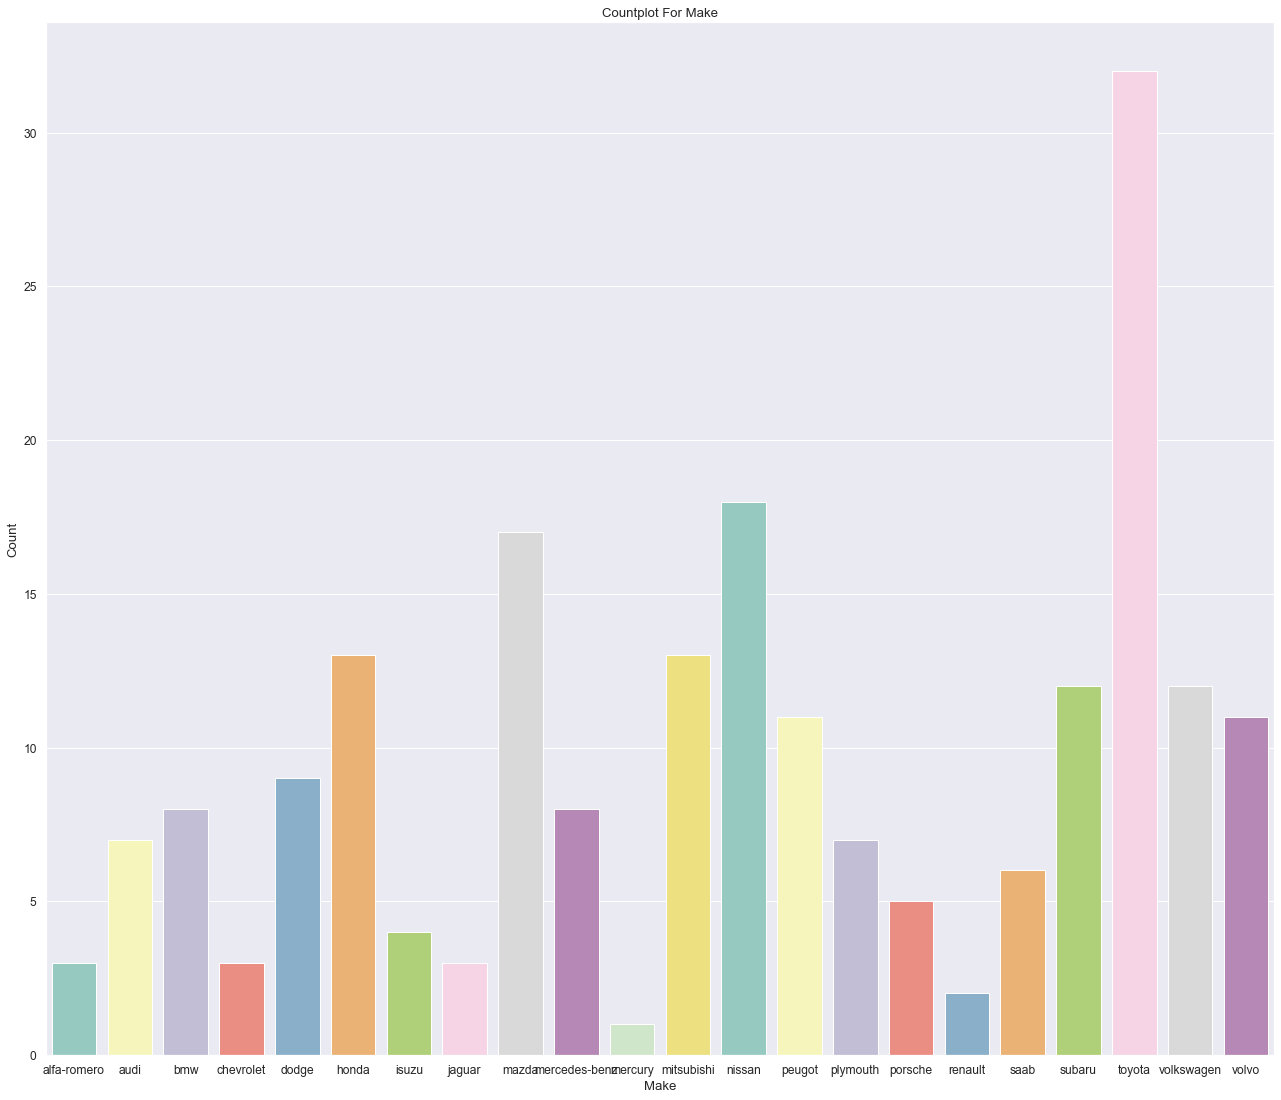

In [29]:
plt.figure(figsize=[22,19])
cntplt(car_df2,"make","Set3","countplot for make")

- Most cars are toyota.

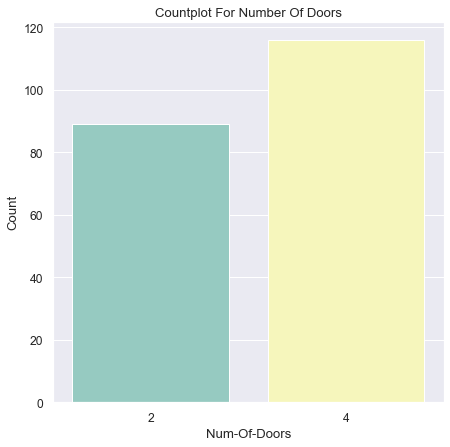

In [30]:
cntplt(car_df2,"num-of-doors","Set3","countplot for number of doors")

- Most cars use four doors.

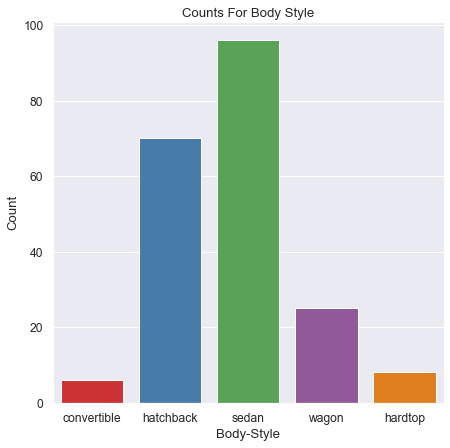

In [31]:
cntplt(car_df2,"body-style","Set1","counts for body style")

- Most cars use sedan style.

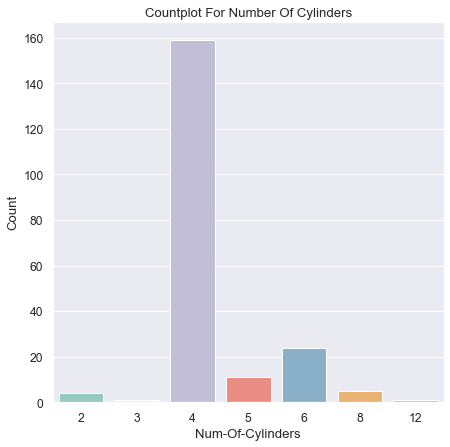

In [32]:
cntplt(car_df2,"num-of-cylinders","Set3","countplot for number of cylinders")

- Most cars use four cylinders.

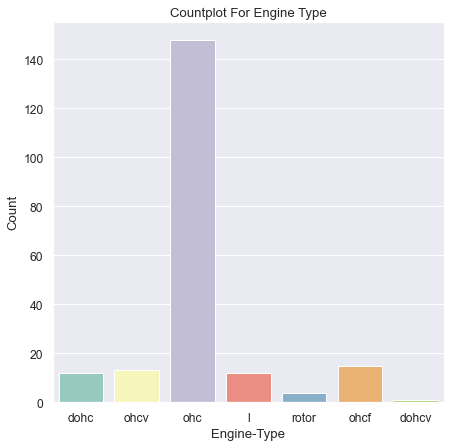

In [33]:
cntplt(car_df2,"engine-type","Set3","countplot for engine type")

- Most engines common are ohc.

In [34]:
def bxplot(data,x,palette,title,y,hue=None):
    '''
    This function for showing distributions with respect to categories.
    INPUT:
    data: DataFrame. The dataset.
    x: str. Feature name in the dataset.
    y: str. Feature name in the dataset.
    palette: str. Palette name.
    title: str. Countplot title.
    hue: str. Feature name in the dataset.
    OUTPUT:
    Boxplot represent the distributions with respect to categories.
    '''
    sns.boxplot(data=data,x=x,y=y,hue=hue,palette=palette)
    plt.title(title.title())
    plt.xlabel(x.title())
    plt.xticks(rotation="vertical",size=12)
    plt.ylabel(y.title())
    plt.show()

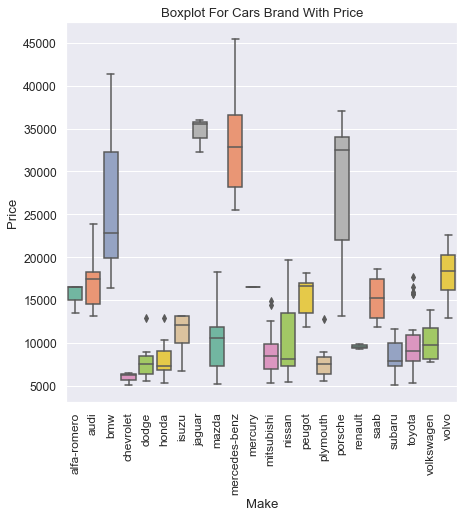

In [35]:
bxplot(car_df2,"make","Set2","boxplot for cars brand with price",y="price")

- Mercedes benz brand, it's price can reach to almost 46000. 

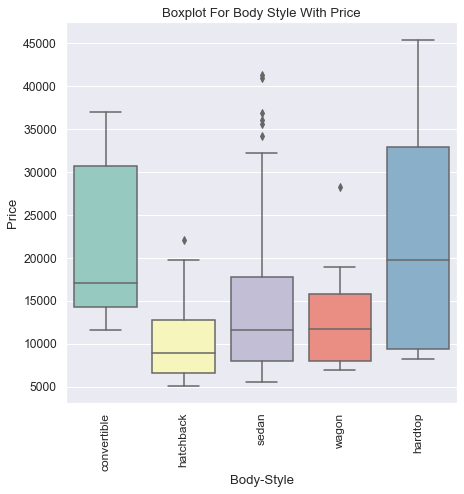

In [36]:
bxplot(car_df2,"body-style","Set3","boxplot for body style with price","price")

- Cars which built  with hardtop style, it's price can reach to almost 46000.

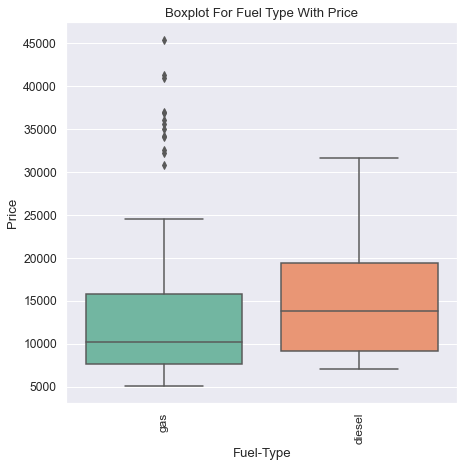

In [37]:
bxplot(car_df2,"fuel-type","Set2","boxplot for fuel type with price","price")

- Cars which use diesel fuel, it's price can reach to almost 32000.

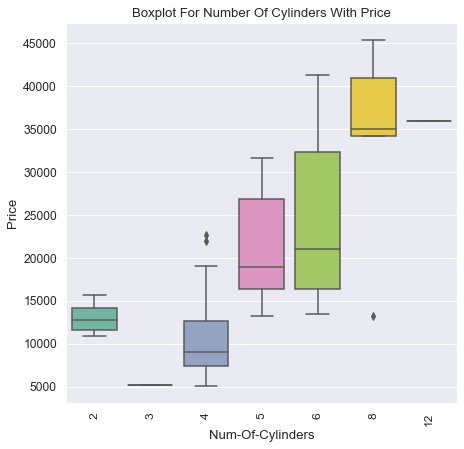

In [38]:
bxplot(car_df2,"num-of-cylinders","Set2","boxplot for number of cylinders with price","price")

- Cars which use eight cylinders, it's price can reach to almost 46000.

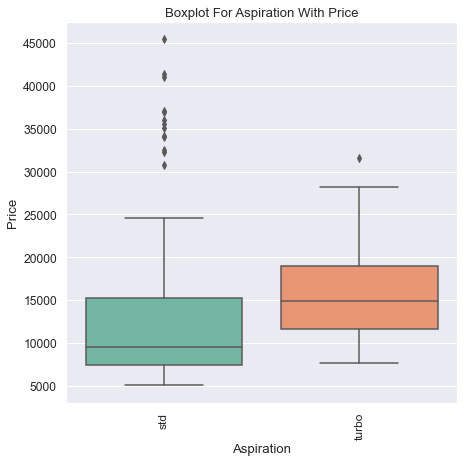

In [39]:
bxplot(car_df2,"aspiration","Set2","boxplot for aspiration with price","price")

- Cars which use turbo, it's price can reach to almost 28000.

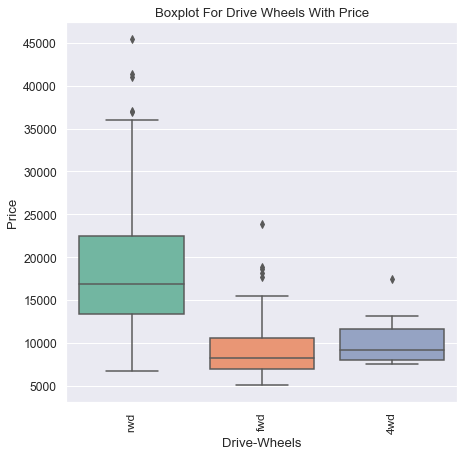

In [40]:
bxplot(car_df2,"drive-wheels","Set2","boxplot for drive wheels with price","price")

- Cars which use rwd, it's price can reach to almost 36000.

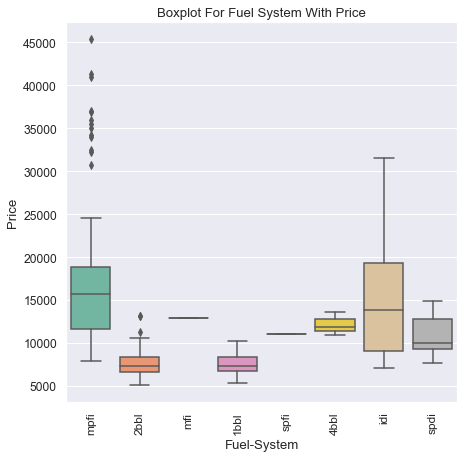

In [41]:
bxplot(car_df2,"fuel-system","Set2","boxplot for fuel system with price","price")

- Cars which use idi, it's price can reach to almost 32000.

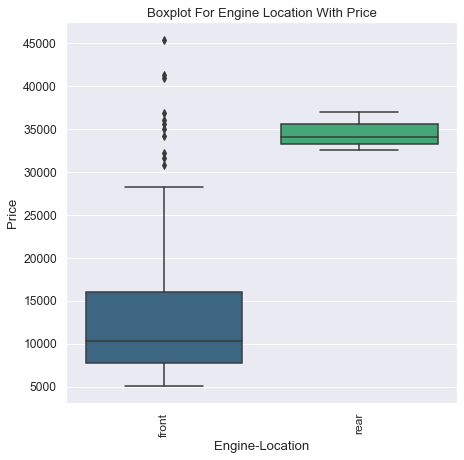

In [42]:
bxplot(car_df2,"engine-location","viridis","boxplot for engine location with price","price")

- Cars which it's engine location is rear, it's price can reach to almost 37000.

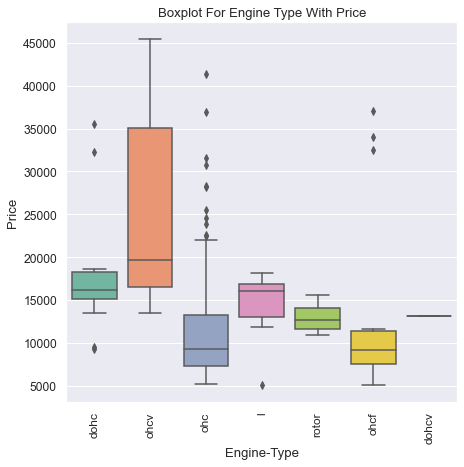

In [43]:
bxplot(car_df2,"engine-type","Set2","boxplot for engine type with price","price")

- Cars which it's engine type is ohcv, it's price can reach to almost 46000.

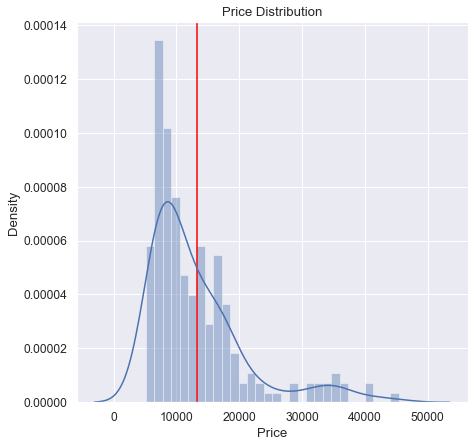

In [44]:
plt.axvline(car_df2["price"].mean(),color="red")
sns.distplot(car_df["price"],bins=30)
plt.xlabel("Price")
plt.title("Price Distribution")
plt.show()

- Price distribution looks like right skewed.
- The average of the price almost equal to 13207.

# Feature Transformations

In [308]:
#Taking a copy from the data frame
car_df3=car_df2.copy()

In [309]:
car_df3.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,2,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,122.0,alfa-romero,gas,std,2,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,122.0,alfa-romero,gas,std,2,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,4,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,4,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [310]:
features_lst=['symboling','normalized-losses','height','stroke','compression-ratio','peak-rpm','num-of-doors']

In [311]:
#Reducing features
car_df3.drop(features_lst,axis=1,inplace=True)

In [312]:
car_df3.head()

,make,fuel-type,aspiration,body-style,drive-wheels,engine-location,wheel-base,length,width,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,horsepower,city-mpg,highway-mpg,price
0,alfa-romero,gas,std,convertible,rwd,front,88.6,168.8,64.1,2548,dohc,4,130,mpfi,3.47,111.0,21,27,13495.0
1,alfa-romero,gas,std,convertible,rwd,front,88.6,168.8,64.1,2548,dohc,4,130,mpfi,3.47,111.0,21,27,16500.0
2,alfa-romero,gas,std,hatchback,rwd,front,94.5,171.2,65.5,2823,ohcv,6,152,mpfi,2.68,154.0,19,26,16500.0
3,audi,gas,std,sedan,fwd,front,99.8,176.6,66.2,2337,ohc,4,109,mpfi,3.19,102.0,24,30,13950.0
4,audi,gas,std,sedan,4wd,front,99.4,176.6,66.4,2824,ohc,5,136,mpfi,3.19,115.0,18,22,17450.0


In [313]:
#Getting dummies
car_df3=pd.get_dummies(car_df3,drop_first=True)

In [314]:
car_df3.head()

,wheel-base,length,width,curb-weight,num-of-cylinders,engine-size,bore,horsepower,city-mpg,highway-mpg,...,engine-type_ohcf,engine-type_ohcv,engine-type_rotor,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,88.6,168.8,64.1,2548,4,130,3.47,111.0,21,27,...,0,0,0,0,0,0,0,1,0,0
1,88.6,168.8,64.1,2548,4,130,3.47,111.0,21,27,...,0,0,0,0,0,0,0,1,0,0
2,94.5,171.2,65.5,2823,6,152,2.68,154.0,19,26,...,0,1,0,0,0,0,0,1,0,0
3,99.8,176.6,66.2,2337,4,109,3.19,102.0,24,30,...,0,0,0,0,0,0,0,1,0,0
4,99.4,176.6,66.4,2824,5,136,3.19,115.0,18,22,...,0,0,0,0,0,0,0,1,0,0


In [315]:
#Splitting the data to x and y
x=car_df3.drop("price",axis=1)
y=pd.DataFrame(car_df3["price"])

In [316]:
x.head()

,wheel-base,length,width,curb-weight,num-of-cylinders,engine-size,bore,horsepower,city-mpg,highway-mpg,...,engine-type_ohcf,engine-type_ohcv,engine-type_rotor,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,88.6,168.8,64.1,2548,4,130,3.47,111.0,21,27,...,0,0,0,0,0,0,0,1,0,0
1,88.6,168.8,64.1,2548,4,130,3.47,111.0,21,27,...,0,0,0,0,0,0,0,1,0,0
2,94.5,171.2,65.5,2823,6,152,2.68,154.0,19,26,...,0,1,0,0,0,0,0,1,0,0
3,99.8,176.6,66.2,2337,4,109,3.19,102.0,24,30,...,0,0,0,0,0,0,0,1,0,0
4,99.4,176.6,66.4,2824,5,136,3.19,115.0,18,22,...,0,0,0,0,0,0,0,1,0,0


In [317]:
y.head()

,price
0,13495.0
1,16500.0
2,16500.0
3,13950.0
4,17450.0


In [318]:
#Splitting the data for training and testing
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [319]:
#Applying MinMaxScaler
scaler_x=MinMaxScaler().fit(x_train)
scaler_y=MinMaxScaler().fit(y_train)
#Transforming x_train, x_test, y_train, y_test
x_train_sc=scaler_x.transform(x_train)
x_test_sc=scaler_x.transform(x_test)
y_train_sc=scaler_y.transform(y_train)
y_test_sc=scaler_y.transform(y_test)

# Building Model

In [320]:
#Applying linear regression model
lr_model=LinearRegression()
lr_model.fit(x_train_sc,y_train_sc)

LinearRegression()

In [321]:
#Scaled prediction
y_pred_sc=lr_model.predict(x_test_sc)

# Evaluating Model Performance

In [322]:
#Applying MAE
mae=mean_absolute_error(y_test_sc,y_pred_sc)
#Applying RMSE
rmse=np.sqrt(mean_squared_error(y_test_sc,y_pred_sc))

In [323]:
mae.round(3)

0.072

In [324]:
rmse.round(3)

0.124

In [325]:
#Get real MAE, RMSE
y_test_inv=scaler_y.inverse_transform(y_test_sc.reshape(-1,1))
y_pred_inv=scaler_y.inverse_transform(y_pred_sc.reshape(-1,1))
actual_mae=mean_absolute_error(y_test_inv,y_pred_inv)
actual_rmse=np.sqrt(mean_squared_error(y_test_inv,y_pred_inv))

In [326]:
actual_mae.round(3)

2588.044

In [327]:
actual_rmse.round(3)

4437.397

# Conclusion

- Most cars are from toyota brand and it's price almost from 6000 to 12000, this refer to this type of cars have a good quality and its's price suitable.
- Most cars use gas and few cars use diesel, we can say that's because cars which use diesel it's price almost from 7000 to 32000 compare to cars which use gas, it's price almost from 5000 to 25000.
- Most cars use 4 cylinders, and it's price almost from 5000 to 19000.
- The average of cars price almost equal to 13207.
- By using mean absolute error, actual prediction almost equal to ±2588 of predicted value.
- By using root mean squared error, actual prediction almost equal to ±4437 of predicted value.